In [36]:
import sys

sys.path.append("..")

In [37]:
from util.run import solve,explain
from util.display import display_explanation_graph
from util.literal import Literal
import clingo

In [38]:
yale_shooting_problem = """

load_gun.
pull_trigger.

loaded_gun :- load_gun.
shoot_turkey :- loaded_gun, pull_trigger.
dead_turkey :- shoot_turkey.

"""

answer_sets, _ = solve(yale_shooting_problem)
answer_set = answer_sets[0]

Answer  1: { dead_turkey load_gun loaded_gun pull_trigger shoot_turkey }.
SAT 1 


In [39]:
explanation_graph, = explain(yale_shooting_problem, answer_set=answer_set, cautious_consequence=answer_set, root=Literal.literal_from_string("dead_turkey"))


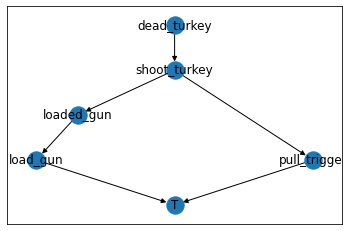

In [40]:
display_explanation_graph(explanation_graph)

In [41]:
yale_shooting_problem_with_agents_and_events = """

time(1..5).

agent(suzie).
event(loaded_gun).
event(shoot_turkey).
event(dead_turkey).

agent_does_at(suzie, load_gun, 1).
agent_does_at(suzie, pull_trigger, 2).

event_happensAt(loaded_gun, T+1) :- time(T+1), agent(Agent), event_happensAt(loaded_gun, T), not agent_does_at(Agent, pull_trigger, T).
event_happensAt(loaded_gun, T+1) :- agent_does_at(Agent, load_gun, T).

event_happensAt(shoot_turkey, T+1) :- agent_does_at(Agent, pull_trigger, T), event_happensAt(loaded_gun, T).

event_happensAt(dead_turkey, T+1) :- time(T+1), event_happensAt(shoot_turkey, T).
event_happensAt(dead_turkey, T+1) :- time(T+1), event_happensAt(dead_turkey, T).

"""

answer_sets,_ = solve(yale_shooting_problem_with_agents_and_events)
answer_set = answer_sets[0]

Answer  1: { agent(suzie) event(dead_turkey) event(loaded_gun) event(shoot_turkey) time(1) time(2) time(3) time(4) time(5) event_happensAt(dead_turkey,4) event_happensAt(dead_turkey,5) event_happensAt(loaded_gun,2) event_happensAt(shoot_turkey,3) agent_does_at(suzie,load_gun,1) agent_does_at(suzie,pull_trigger,2) }.
SAT 1 


In [42]:
#explanation_graph, = explain(yale_shooting_problem, answer_set=answer_set, cautious_consequence=answer_set,
#                             root=Literal.literal_from_symbol(clingo.Function("event_happensAt", [clingo.Function("dead_turkey", [],), clingo.Number(5)])))

In [43]:
#display_explanation_graph(explanation_graph)

In [44]:
yale_shooting_problem_with_multiagents_and_events = """

time(1..7).

agent(suzie).
agent(tommy).

action(load_gun).
action(pull_trigger).
action(transfersMagTo(Agent)) :- agent(Agent).

event(agentHasMagazine(Agent)) :- agent(Agent).
event(loaded_gun).
event(shoot_turkey).
event(dead_turkey).

event_happensAt(agentHasMagazine(tommy), 1).
agent_does_at(tommy, transfersMagTo(suzie), 2).
agent_does_at(suzie, load_gun, 3).
agent_does_at(suzie, pull_trigger, 4).

event_happensAt(agentHasMagazine(Agent), T+1) :-
  agent(Receive), time(T+1), Receive != Agent,
  event_happensAt(agentHasMagazine(Agent), T),
  not agent_does_at(Agent, transfersMagTo(Receive), T),
  not agent_does_at(Agent, load_gun, T).
event_happensAt(agentHasMagazine(Receive), T+1) :-
  time(T+1),
  event_happensAt(agentHasMagazine(Give), T),
  agent_does_at(Give, transfersMagTo(Receive), T).

event_happensAt(loaded_gun, T+1) :-
  time(T+1), agent(Agent),
  event_happensAt(loaded_gun, T), not agent_does_at(Agent, pull_trigger, T).
event_happensAt(loaded_gun, T+1) :- agent_does_at(Agent, load_gun, T), event_happensAt(agentHasMagazine(Agent), T).

event_happensAt(shoot_turkey, T+1) :- agent_does_at(Agent, pull_trigger, T), event_happensAt(loaded_gun, T).

event_happensAt(dead_turkey, T+1) :- time(T+1), event_happensAt(shoot_turkey, T).
event_happensAt(dead_turkey, T+1) :- time(T+1), event_happensAt(dead_turkey, T).

"""

answer_sets,_ = solve(yale_shooting_problem_with_multiagents_and_events)
answer_set = answer_sets[0]

Answer  1: { action(load_gun) action(pull_trigger) action(transfersMagTo(suzie)) action(transfersMagTo(tommy)) agent(suzie) agent(tommy) event(dead_turkey) event(loaded_gun) event(shoot_turkey) event(agentHasMagazine(suzie)) event(agentHasMagazine(tommy)) time(1) time(2) time(3) time(4) time(5) time(6) time(7) event_happensAt(dead_turkey,6) event_happensAt(dead_turkey,7) event_happensAt(loaded_gun,4) event_happensAt(loaded_gun,5) event_happensAt(loaded_gun,6) event_happensAt(loaded_gun,7) event_happensAt(shoot_turkey,5) event_happensAt(agentHasMagazine(suzie),3) event_happensAt(agentHasMagazine(tommy),1) event_happensAt(agentHasMagazine(tommy),2) agent_does_at(suzie,load_gun,3) agent_does_at(suzie,pull_trigger,4) agent_does_at(tommy,transfersMagTo(suzie),2) }.
SAT 1 


In [45]:
#explanation_graph, = explain(yale_shooting_problem_with_multiagents_and_events, answer_set=answer_set, cautious_consequence=answer_set,
#                             root=Literal.literal_from_symbol(clingo.Function("event_happensAt", [clingo.Function("dead_turkey"), clingo.Number(7)])))

In [46]:
#display_explanation_graph(explanation_graph)

In [47]:
scenario = """

time(1).
time(2).
time(3).
time(4).
event(e1).
event(e2).
event(e3).
fluent(a).
fluent(b).
fluent(c).
fluent(d).
fluent(e).
fluent(f).

obs_at(f, 1).
occ_at(e1, 1).
occ_at(e2, 2).
occ_at(e3, 3).

impossible_if(e1, a).             % law  5
event_causes_if(e1, e, neg(e)).   % law  6
event_causes_if(e2, d, neg(d)).   % law  7
event_causes_if(e3, a, neg(a)).   % law  8
event_causes_if(e3, c, neg(c)).   % law  9
impossible_if(e3, neg(e)).        % law 10
impossible_if(e3, neg(f)).        % law 11
fluent_if(b, c).                  % law 12

%:- impossible_if(E, F), obs_at(F, T), occ_at(E, T), event(E), fluent(F), time(T).
%:- impossible_if(E, neg(F)), not obs_at(F, T), occ_at(E, T), event(E), fluent(F), time(T).

obs_at(F, T+1) :-
  obs_at(F, T),
  not event_causes_if(E1, neg(F), I1),
  not event_causes_if(E2, neg(F), neg(I2)),
  not fluent_if(neg(F), F1),
  not fluent_if(neg(F), neg(F2)),
  event(E1),event(E2),
  fluent(I1), fluent(I2), fluent(F), fluent(F1), fluent(F2),
  time(T), time(T+1).

obs_at(F, T+1) :-
  event_causes_if(E, F, I),
  occ_at(E, T),
  obs_at(I, T),
  event(E),
  fluent(F), fluent(I),
  time(T), time(T+1).

obs_at(F, T+1) :-
  occ_at(E, T),
  event_causes_if(E, F, neg(I)),
  not obs_at(I, T),
  event(E),
  fluent(F), fluent(I),
  time(T), time(T+1).

obs_at(F, T) :-
  fluent_if(F, I),
  obs_at(I, T),
  fluent(F), fluent(I),
  time(T).

obs_at(F, T) :-
  fluent_if(F, neg(I)),
  not obs_at(I, T),
  fluent(F), fluent(I),
  time(T).

"""

answer_sets,_ = solve(scenario, sep='\n');
answer_set = answer_sets[0]

Answer  1: {
event(e1)
event(e2)
event(e3)
fluent(a)
fluent(b)
fluent(c)
fluent(d)
fluent(e)
fluent(f)
time(1)
time(2)
time(3)
time(4)
fluent_if(b,c)
impossible_if(e1,a)
impossible_if(e3,neg(e))
impossible_if(e3,neg(f))
obs_at(a,4)
obs_at(b,4)
obs_at(c,4)
obs_at(d,3)
obs_at(d,4)
obs_at(e,2)
obs_at(e,3)
obs_at(e,4)
obs_at(f,1)
obs_at(f,2)
obs_at(f,3)
obs_at(f,4)
occ_at(e1,1)
occ_at(e2,2)
occ_at(e3,3)
event_causes_if(e1,e,neg(e))
event_causes_if(e2,d,neg(d))
event_causes_if(e3,a,neg(a))
event_causes_if(e3,c,neg(c))
}.
SAT 1 


In [48]:
explanation_graph, = explain(scenario, answer_set=answer_set, cautious_consequence=answer_set, root=Literal.literal_from_symbol(clingo.Function("obs_at", [clingo.Function("a"), clingo.Number(4)])))

In [49]:
display_explanation_graph(explanation_graph)

AttributeError: 'NoneType' object has no attribute 'is_directed'